# <span style="color:Orange ;">Myntra's Fashion Store </span>


   ## <span style=" color:magenta ;">Team Member : Sinchana M C </span>

## <span style="color:black;"> Installing Required Libraries for Database Interaction and Data Analysis</span>


In [1]:
pip install mysql-connector-python pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


## MySQL Data Insertion Script for Myntra Fashion Data

In [4]:
import pandas as pd
import mysql.connector

# Connect to the database
conn = mysql.connector.connect(
    host='localhost',
    user='root',
    password='shrush@1234567',
    database='mytra_db'
)
cursor = conn.cursor()

# Read the CSV file into a DataFrame
df = pd.read_csv("D:/Myntra Fasion Clothing.csv/Myntra Fasion Clothing.csv")

# Check the maximum length of the SizeOption column
max_length = df['SizeOption'].apply(len).max()
print(f"Maximum length of SizeOption: {max_length}")

# Truncate SizeOption values if they exceed the maximum length (e.g., 50 characters)
df['SizeOption'] = df['SizeOption'].str.slice(0, 50)

# Fill NaN values if necessary
df.fillna('', inplace=True)  # Replace NaN with empty strings for all columns

# Insert data into the table
try:
    for i, row in df.iterrows():
        cursor.execute("""
            INSERT INTO fashion_clothing (URL, Product_id, BrandName, Category, Individual_category, 
            category_by_Gender, Description, DiscountPrice, OriginalPrice,
            SizeOption, Ratings, Reviews) 
            VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
        """, tuple(row.values))  # Ensure you are passing all values

    # Commit the transaction
    conn.commit()
except mysql.connector.Error as err:
    print(f"Error: {err}")
finally:
    # Close the cursor and connection
    cursor.close()
    conn.close()

Maximum length of SizeOption: 432


## <span style="color:darkblue;"> Myntra's Brand Powerhouse: Unveling the Top 15 ( Based on Product Count ) </span>.


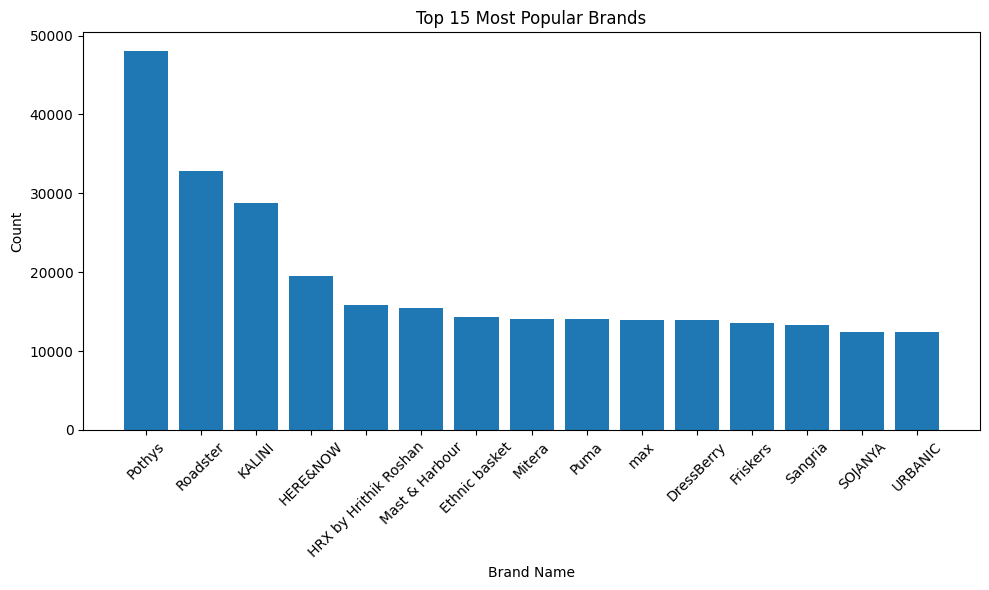

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import mysql.connector

# Connect to the database 
conn = mysql.connector.connect(
    host='localhost',
    user='root',
    password='shrush@1234567',
    database='mytra_db'
)

# Query the database for top 15 brands
query = "SELECT BrandName, COUNT(*) AS Count FROM fashion_clothing GROUP BY BrandName ORDER BY Count DESC LIMIT 15"
cursor = conn.cursor()
cursor.execute(query)
results = cursor.fetchall()

# Create a DataFrame from the query results
df_results = pd.DataFrame(results, columns=['BrandName', 'Count'])

# Visualize the data
plt.figure(figsize=(10, 6))
plt.bar(df_results['BrandName'], df_results['Count'])
plt.xlabel('Brand Name')
plt.ylabel('Count')
plt.title('Top 15 Most Popular Brands')
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout to prevent overlapping labels
plt.show()

# Close the connection
conn.close()

## <span style="color:blue;"> Most Popular Product Categories on Myntra </span>.


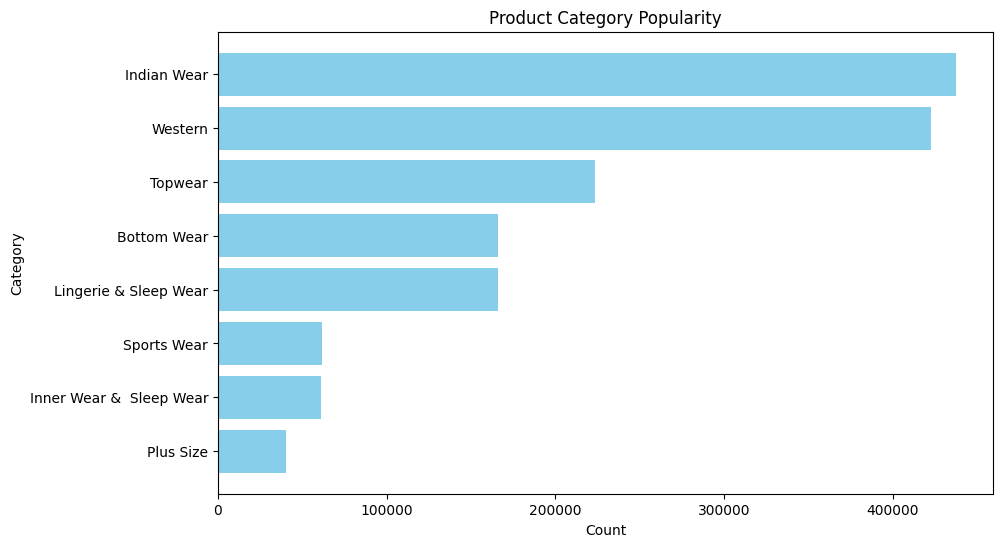

In [13]:
import pandas as pd
import mysql.connector
import matplotlib.pyplot as plt

# Step 1: Connect to the MySQL database
conn = mysql.connector.connect(
    host='localhost',        # e.g., 'localhost'
    user='root',        # your MySQL username
    password='shrush@1234567', # your MySQL password
    database='mytra_db'  # your MySQL database name
)

# Step 2: Query for product category popularity
query = """
SELECT Category, COUNT(*) AS Count
FROM fashion_clothing
GROUP BY Category
ORDER BY Count DESC
"""
cursor = conn.cursor()
cursor.execute(query)
results = cursor.fetchall()

# Step 3: Create a DataFrame
df_category = pd.DataFrame(results, columns=['Category', 'Count'])

# Step 4: Visualize category popularity
plt.figure(figsize=(10, 6))
plt.barh(df_category['Category'], df_category['Count'], color='skyblue')
plt.xlabel('Count')
plt.ylabel('Category')
plt.title('Product Category Popularity')
plt.gca().invert_yaxis()  # Invert y-axis to have the most popular category on top
plt.show()

# Step 5: Close the cursor and connection
cursor.close()
conn.close()

## <span style="color:darkorange;"> Myntra's Price Landscape: A Look at Discount Price Distribution </span>.


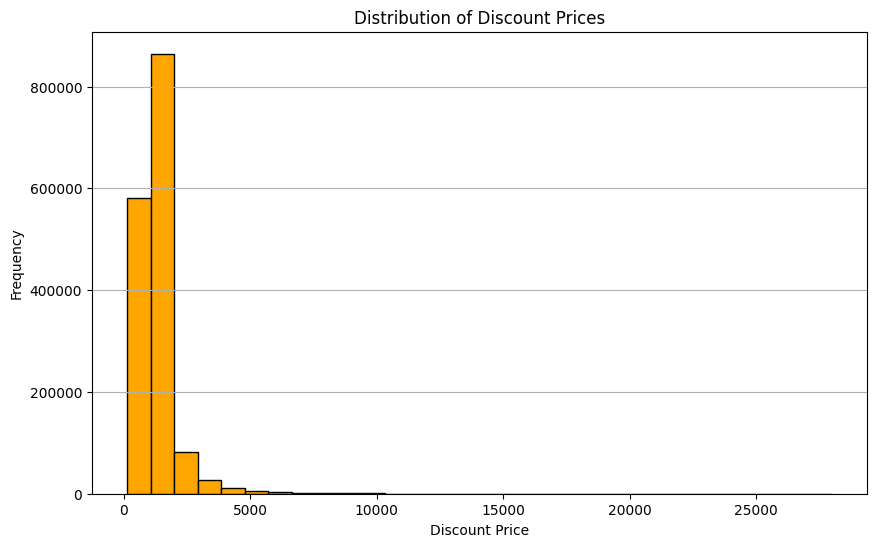

In [17]:
# Query for price distribution
query_prices = """
SELECT DiscountPrice
FROM fashion_clothing
WHERE DiscountPrice IS NOT NULL
"""
cursor = conn.cursor()
cursor.execute(query_prices)
results_prices = cursor.fetchall()

# Create a DataFrame
df_prices = pd.DataFrame(results_prices, columns=['DiscountPrice'])

# Visualize price distribution
plt.figure(figsize=(10, 6))
plt.hist(df_prices['DiscountPrice'], bins=30, color='orange', edgecolor='black')
plt.xlabel('Discount Price')
plt.ylabel('Frequency')
plt.title('Distribution of Discount Prices')
plt.grid(axis='y')
plt.show()

## <span style="color:purple;"> Myntra's Customer Voice: Distribution of Product Ratings</span>.


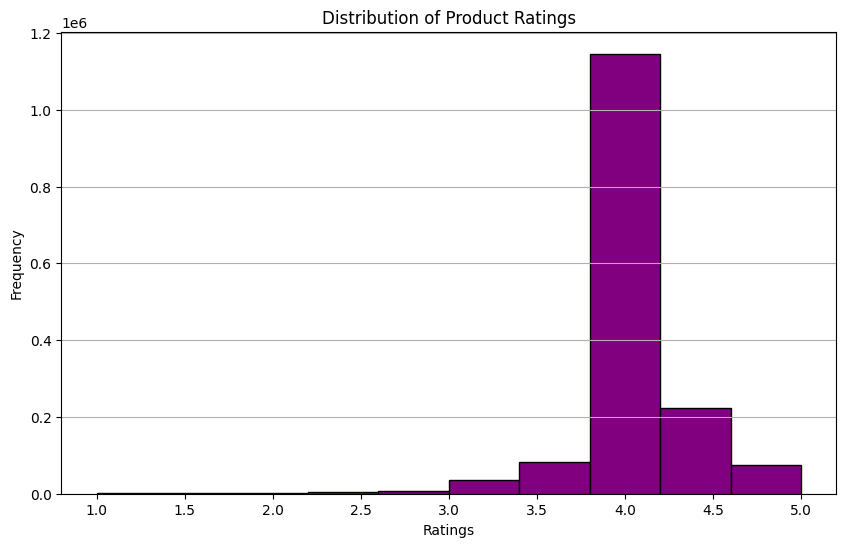

In [18]:
# Query for ratings distribution
query_ratings = """
SELECT Ratings
FROM fashion_clothing
WHERE Ratings IS NOT NULL
"""
cursor = conn.cursor()
cursor.execute(query_ratings)
results_ratings = cursor.fetchall()

# Create a DataFrame
df_ratings = pd.DataFrame(results_ratings, columns=['Ratings'])

# Visualize ratings distribution
plt.figure(figsize=(10, 6))
plt.hist(df_ratings['Ratings'], bins=10, color='purple', edgecolor='black')
plt.xlabel('Ratings')
plt.ylabel('Frequency')
plt.title('Distribution of Product Ratings')
plt.grid(axis='y')
plt.show()

## <span style ="color:lightcoral;"> Myntra's Price Spectrum: Exploring Average Prices By Category </span>

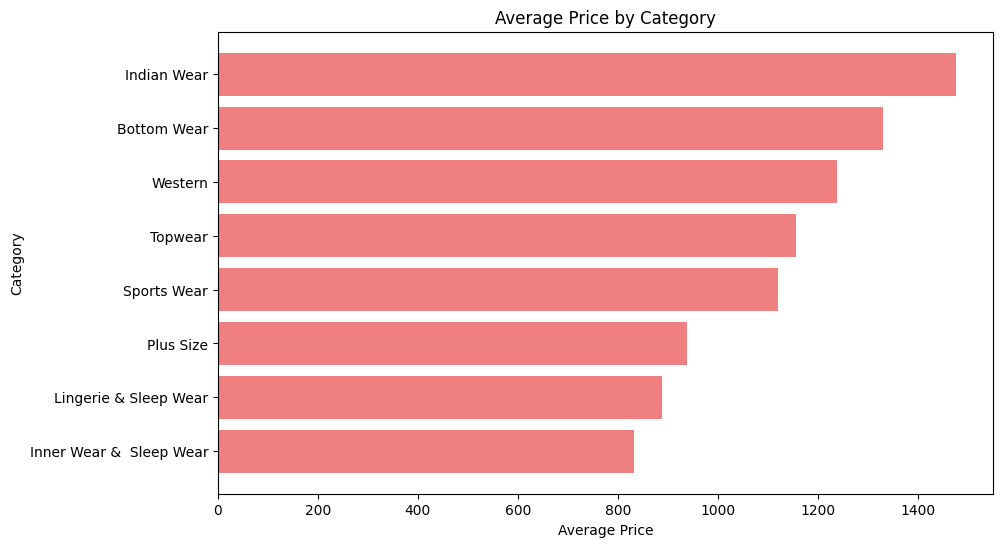

In [19]:
# Query for average price by category
query_avg_price = """
SELECT Category, AVG(DiscountPrice) AS AvgPrice
FROM fashion_clothing
GROUP BY Category
ORDER BY AvgPrice DESC
"""
cursor = conn.cursor()
cursor.execute(query_avg_price)
results_avg_price = cursor.fetchall()

# Create a DataFrame
df_avg_price = pd.DataFrame(results_avg_price, columns=['Category', 'AvgPrice'])

# Visualize average price by category
plt.figure(figsize=(10, 6))
plt.barh(df_avg_price['Category'], df_avg_price['AvgPrice'], color='lightcoral')
plt.xlabel('Average Price')
plt.ylabel('Category')
plt.title('Average Price by Category')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest average price on top
plt.show()

## <span style ="color:red;"> Myntra's Fashion Insights: A Look at Feature Correlations </span>

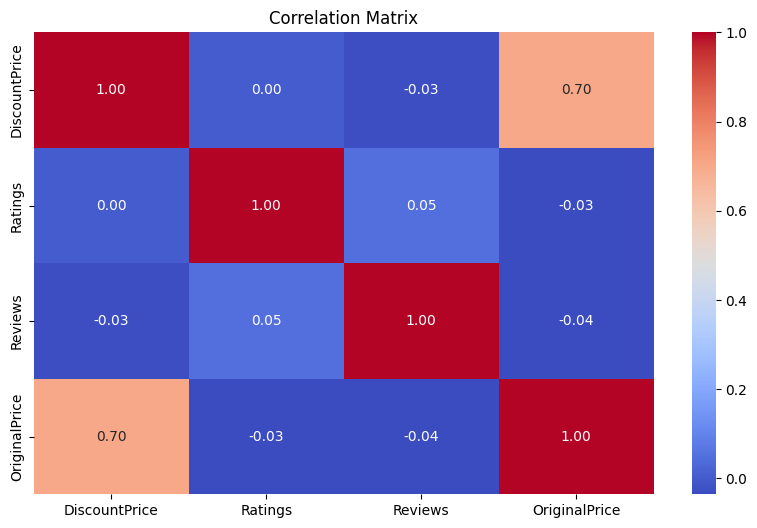

In [23]:
import seaborn as sns

# Query for numerical features
query_numerical = """
SELECT DiscountPrice, Ratings, Reviews , OriginalPrice
FROM fashion_clothing
WHERE DiscountPrice IS NOT NULL AND Ratings IS NOT NULL
"""
cursor = conn.cursor()
cursor.execute(query_numerical)
results_numerical = cursor.fetchall()

# Create a DataFrame
df_numerical = pd.DataFrame(results_numerical, columns=['DiscountPrice', 'Ratings', 'Reviews','OriginalPrice'])

# Visualize the correlation matrix
plt.figure(figsize=(10, 6))
correlation_matrix = df_numerical.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

## <span style ="color:blue;"> Myntra's Price Landscape: Unveiling Differences Across Categories</span>

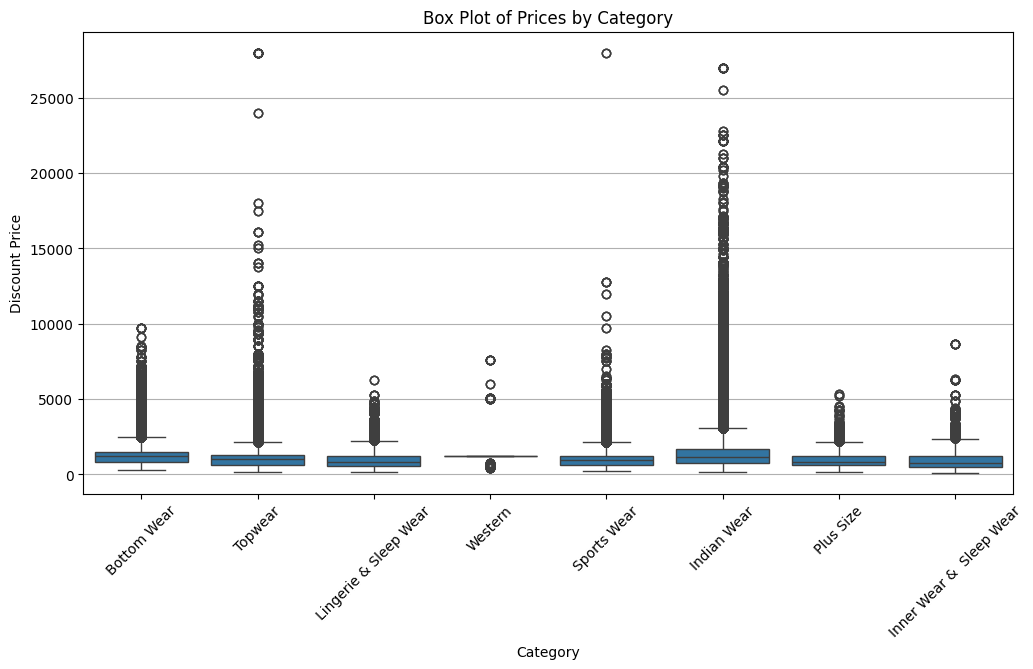

In [24]:
# Query for prices by category
query_prices_by_category = """
SELECT Category, DiscountPrice
FROM fashion_clothing
WHERE DiscountPrice IS NOT NULL
"""
cursor = conn.cursor()
cursor.execute(query_prices_by_category)
results_prices_by_category = cursor.fetchall()

# Create a DataFrame
df_prices_by_category = pd.DataFrame(results_prices_by_category, columns=['Category', 'DiscountPrice'])

# Visualize box plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Category', y='DiscountPrice', data=df_prices_by_category)
plt.xticks(rotation=45)
plt.title('Box Plot of Prices by Category')
plt.xlabel('Category')
plt.ylabel('Discount Price')
plt.grid(axis='y')
plt.show()

## <span style ="color:brown;"> Myntra's Category Mix: A Pie chart Breakdown </span>

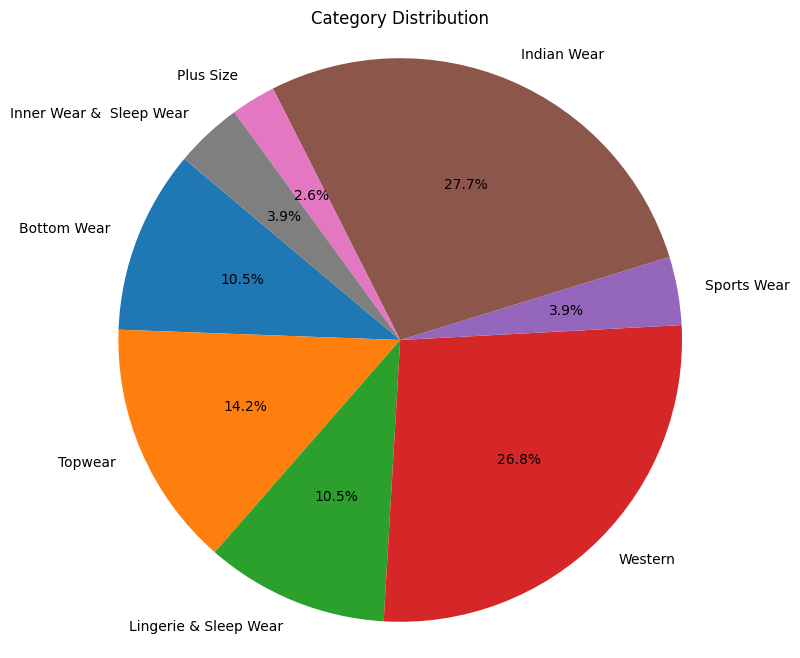

In [25]:
# Query for category distribution
query_category_distribution = """
SELECT Category, COUNT(*) AS Count
FROM fashion_clothing
GROUP BY Category
"""
cursor = conn.cursor()
cursor.execute(query_category_distribution)
results_category_distribution = cursor.fetchall()

# Create a DataFrame
df_category_distribution = pd.DataFrame(results_category_distribution, columns=['Category', 'Count'])

# Visualize pie chart
plt.figure(figsize=(8, 8))
plt.pie(df_category_distribution['Count'], labels=df_category_distribution['Category'], autopct='%1.1f%%', startangle=140)
plt.title('Category Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular.
plt.show()

## <span style ="color: blue ;">  Top 10 brands based on Gender </span>

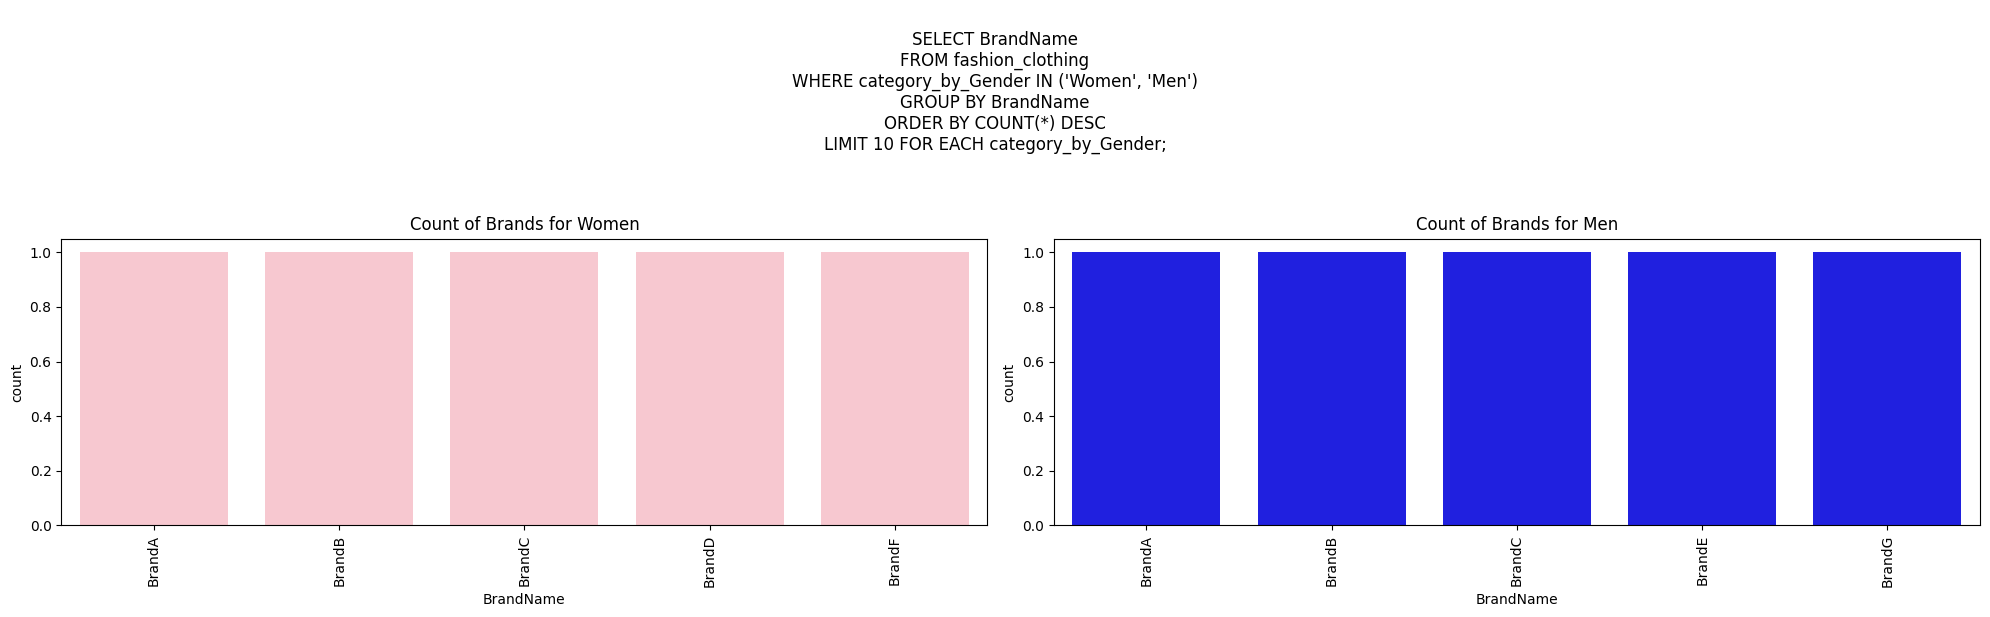

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Sample DataFrame creation (replace with your actual data)
df = pd.DataFrame({
    'BrandName': ['BrandA', 'BrandB', 'BrandC', 'BrandA', 'BrandB', 'BrandC', 'BrandD', 'BrandE', 'BrandF', 'BrandG'],
    'category_by_Gender': ['Women', 'Women', 'Women', 'Men', 'Men', 'Men', 'Women', 'Men', 'Women', 'Men']
})

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(20, 6))

# Combine filtering logic for top brands into a single query-like string
top_brands_query = f"""
SELECT BrandName
FROM fashion_clothing
WHERE category_by_Gender IN ('Women', 'Men')
GROUP BY BrandName
ORDER BY COUNT(*) DESC
LIMIT 10 FOR EACH category_by_Gender;
"""

# Set the title with the combined query string
plt.suptitle(top_brands_query, y=1.02)  # Adjust y position slightly above the subplots

# Get the top 10 brands (consider combining for efficiency)
top_brands_women = df[df['category_by_Gender'] == 'Women']['BrandName'].value_counts().index[:10]
top_brands_men = df[df['category_by_Gender'] == 'Men']['BrandName'].value_counts().index[:10]

# Create a color column based on gender
df['color'] = df['category_by_Gender'].map({'Women': 'pink', 'Men': 'blue'})

# Plot count of brands for women
sns.countplot(data=df[df['category_by_Gender'] == 'Women'],
              x='BrandName',
              ax=axs[0],
              order=top_brands_women,
              hue='color',  # Use the color column for hue
              dodge=False,  # Ensure bars are not dodged
              palette=['pink'],  # Set color to pink for women
              legend=False)  # Disable legend
axs[0].set_title("Count of Brands for Women")
axs[0].tick_params(axis='x', rotation=90)  # Rotate x-axis labels for better readability

# Plot count of brands for men
sns.countplot(data=df[df['category_by_Gender'] == 'Men'],
              x='BrandName',
              ax=axs[1],
              order=top_brands_men,
              hue='color',  # Use the color column for hue
              dodge=False,  # Ensure bars are not dodged
              palette=['blue'],  # Set color to blue for men
              legend=False)  # Disable legend
axs[1].set_title("Count of Brands for Men")
axs[1].tick_params(axis='x', rotation=90)  # Rotate x-axis labels for better readability

# Adjust layout to prevent overlap
plt.tight_layout()

# Show plots
plt.show()

## <span style ="color: Green ;"> Top 10 brands in Indian Wear Section </span>

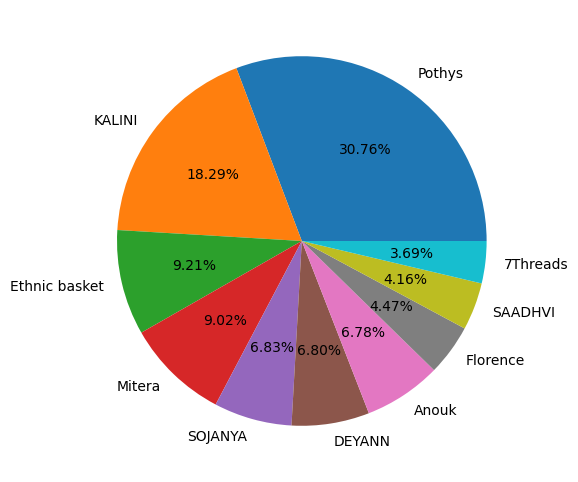

In [39]:
IndianWear = df[df['Category'] == 'Indian Wear']
sizes = IndianWear['BrandName'].value_counts().head(10).values
labels = IndianWear['BrandName'].value_counts().head(10).index

fig, axs = plt.subplots( figsize=(12, 6))

plt.pie(sizes, labels=labels, autopct='%1.2f%%')
plt.show()


## <span style ="color: gold ;"> Top 10 brands in Western Wear Section </span>

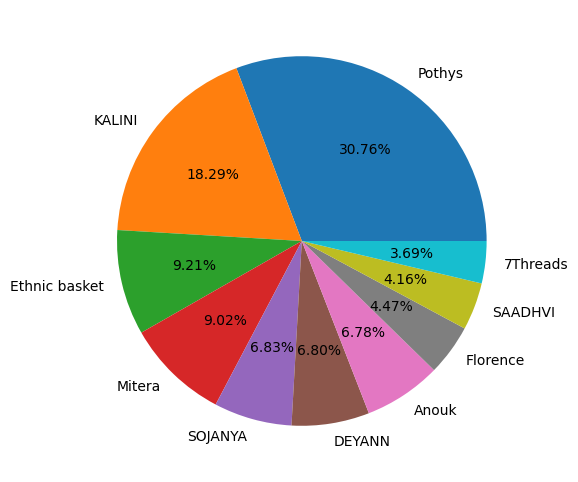

In [40]:
WesternWear = df[df['Category'] == 'Indian Wear']
sizes = WesternWear['BrandName'].value_counts().head(10).values
labels = WesternWear['BrandName'].value_counts().head(10).index

fig, axs = plt.subplots( figsize=(12, 6))

plt.pie(sizes, labels=labels, autopct='%1.2f%%')
plt.show()

## <span style ="color: magenta ;"> Top 10  tshirts brand  </span>

C:\Users\Omen\AppData\Local\Temp\ipykernel_77272\1598866183.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=brand_counts_sorted, y=top_brands, palette=colors, ax=ax)


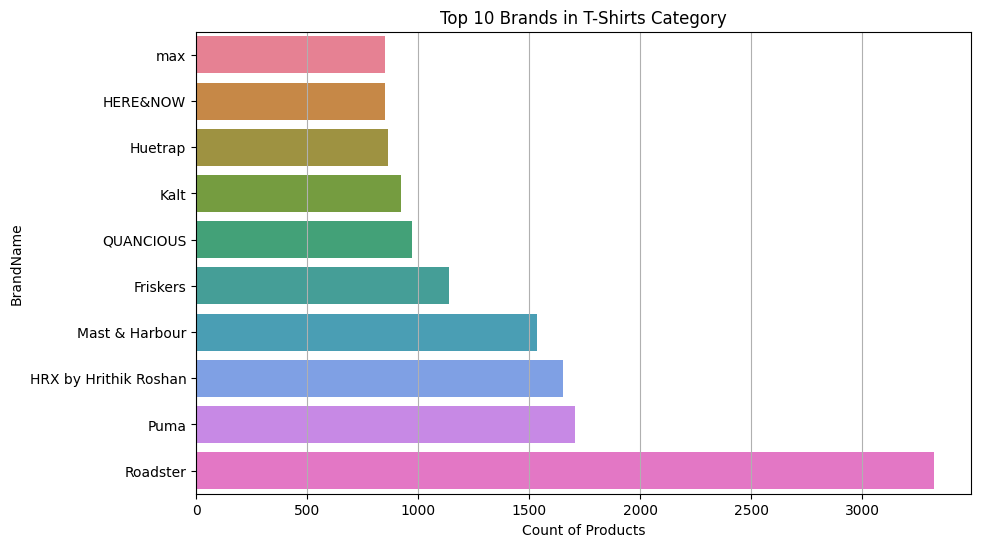

In [41]:
TSHIRT = df[df['Individual_category'] == 'tshirts']
brand_counts = TSHIRT['BrandName'].value_counts().head(10)
top_brands = brand_counts.index.tolist()[::-1]
brand_counts_sorted = brand_counts.sort_values()

fig, ax = plt.subplots(figsize=(10, 6))

# Define a color palette with different colors for each category
colors = sns.color_palette("husl", len(brand_counts_sorted))

sns.barplot(x=brand_counts_sorted, y=top_brands, palette=colors, ax=ax)
ax.set_xlabel('Count of Products')
ax.set_ylabel('BrandName')
ax.set_title('Top 10 Brands in T-Shirts Category')
plt.grid(axis='x')

plt.show()

## <span style ="color: magenta;"> Top 10 sarees brands</span>

C:\Users\Omen\AppData\Local\Temp\ipykernel_77272\434793631.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=brand_counts_sorted, y=top_brands, palette=colors, ax=ax)


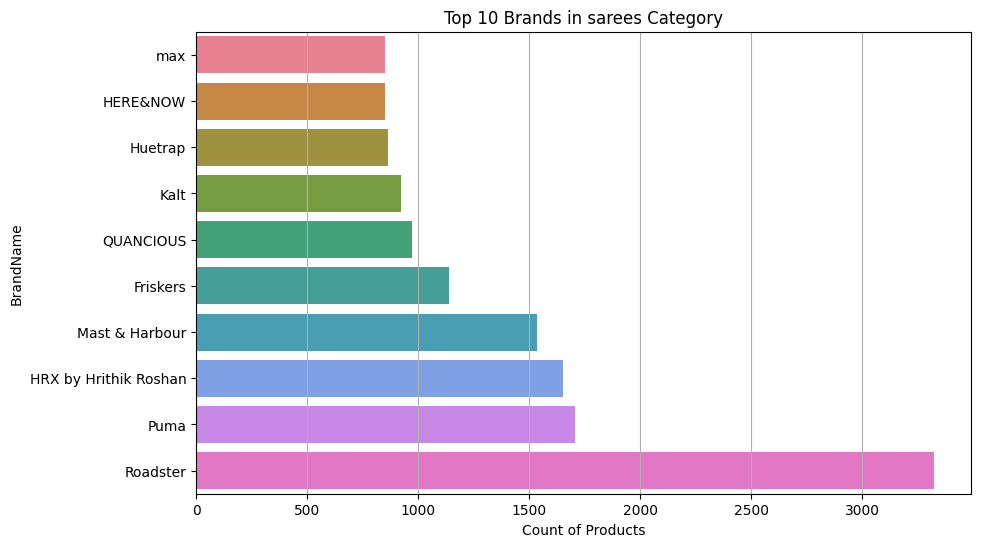

In [42]:
SAREES = df[df['Individual_category'] == 'sarees']
brand_counts = TSHIRT['BrandName'].value_counts().head(10)
top_brands = brand_counts.index.tolist()[::-1]
brand_counts_sorted = brand_counts.sort_values()

fig, ax = plt.subplots(figsize=(10, 6))

# Define a color palette with different colors for each category
colors = sns.color_palette("husl", len(brand_counts_sorted))

sns.barplot(x=brand_counts_sorted, y=top_brands, palette=colors, ax=ax)
ax.set_xlabel('Count of Products')
ax.set_ylabel('BrandName')
ax.set_title('Top 10 Brands in sarees Category')
plt.grid(axis='x')

plt.show()

## <span style ="color: orange ;">Most selling category in women  </span>

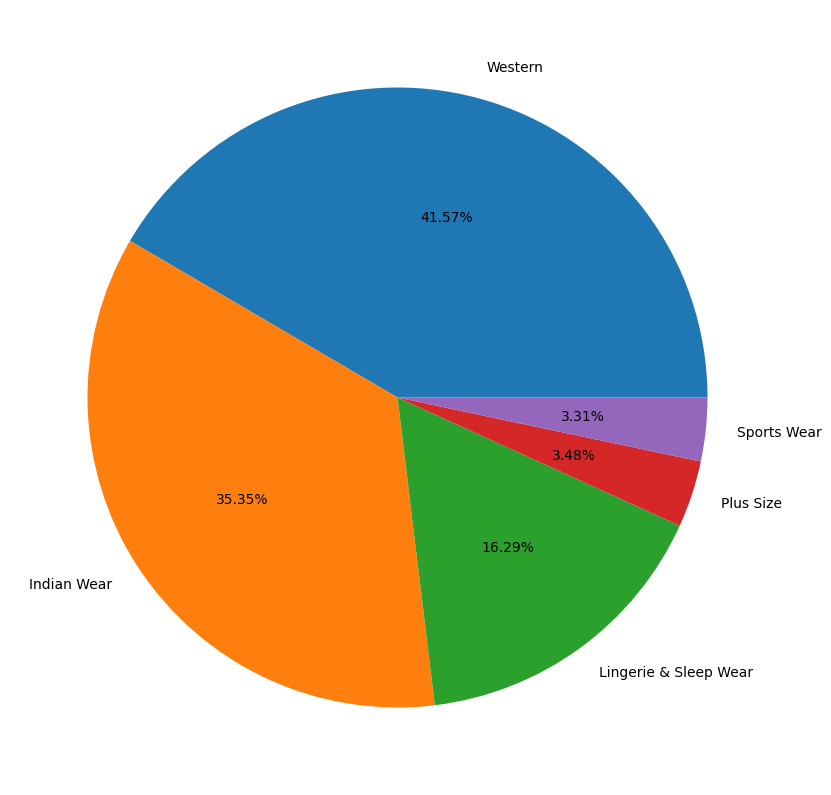

In [43]:
WOMEN = df[df['category_by_Gender'] == 'Women']
S = WOMEN['Category'].value_counts().values
V = WOMEN['Category'].value_counts().index

fig, axs = plt.subplots( figsize=(10, 15))
plt.pie(S[:15],labels=V[:15],autopct='%1.2f%%')
plt.show()

## <span style ="color: blue ;">Most Seliing category in men </span>

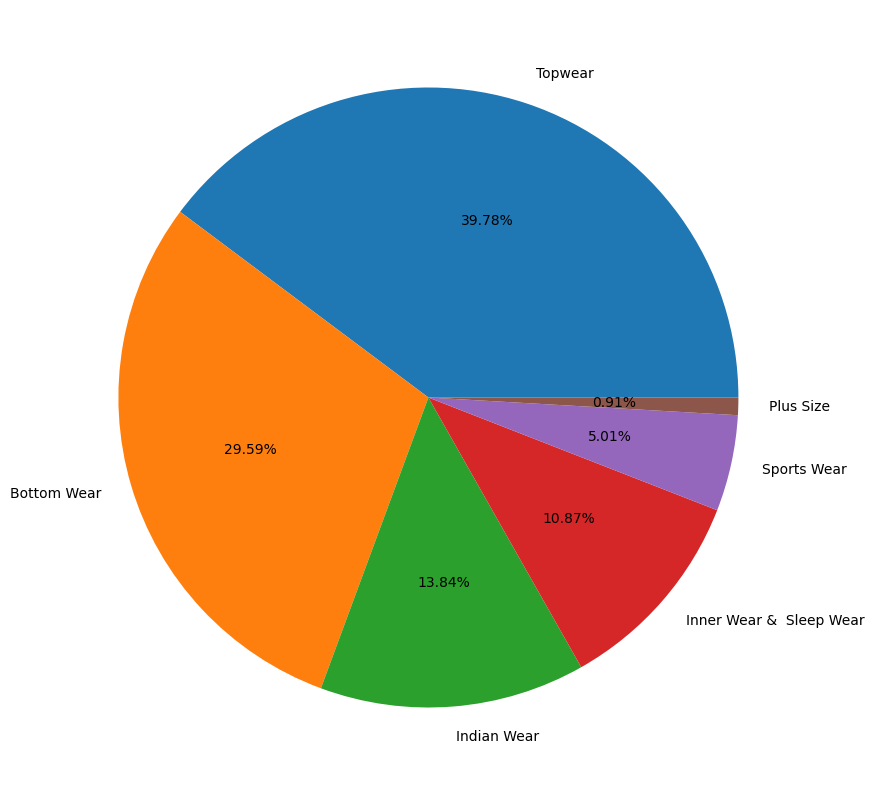

In [44]:
MEN = df[df['category_by_Gender'] == 'Men']
Si = MEN['Category'].value_counts().values
Vi = MEN['Category'].value_counts().index

fig, axs = plt.subplots( figsize=(10, 15))
plt.pie(Si[:15],labels=Vi[:15],autopct='%1.2f%%')
plt.show()

## <span style ="color: red ;"> Men vs. Women: Unveiling Differences in Popular Clothing Sizes </span>

C:\Users\Omen\AppData\Local\Temp\ipykernel_77272\3924964635.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=most_popular_men_sizes.values, y=most_popular_men_sizes.index, ax=axs[0], palette="Blues_d")
C:\Users\Omen\AppData\Local\Temp\ipykernel_77272\3924964635.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=most_popular_women_sizes.values, y=most_popular_women_sizes.index, ax=axs[1], palette="Reds_d")


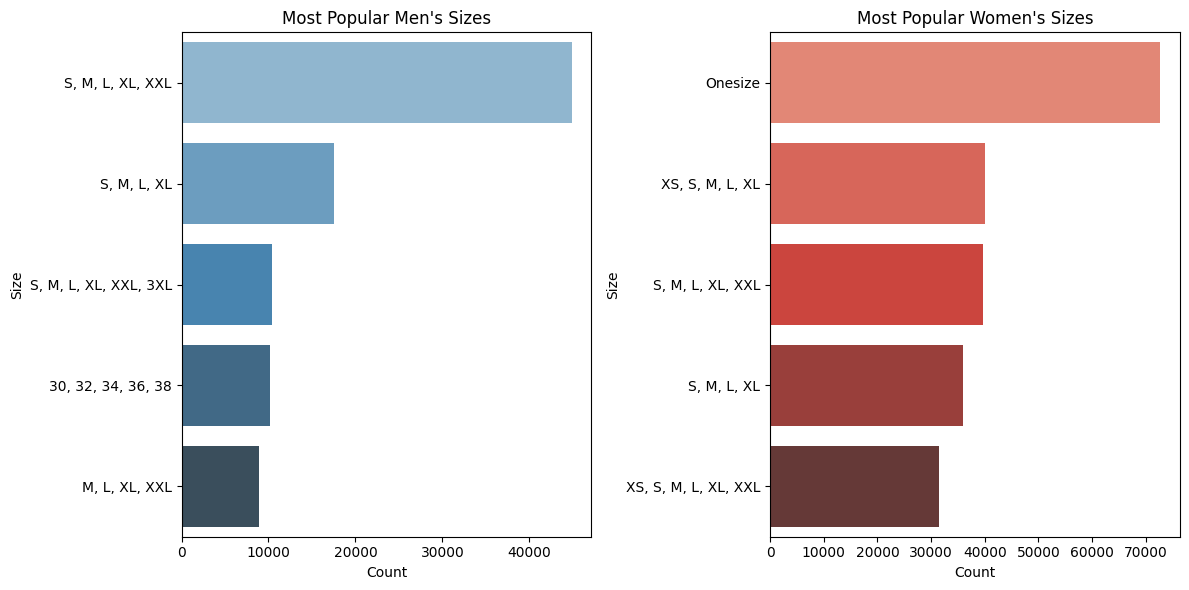

In [45]:
# Filter the DataFrame for men and women separately
men_sizes = df[df['category_by_Gender'] == 'Men']['SizeOption']
women_sizes = df[df['category_by_Gender'] == 'Women']['SizeOption']

# Count the occurrences of each size option for men and women
most_popular_men_sizes = men_sizes.value_counts().head(5)
most_popular_women_sizes = women_sizes.value_counts().head(5)

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot most popular men's sizes
sns.barplot(x=most_popular_men_sizes.values, y=most_popular_men_sizes.index, ax=axs[0], palette="Blues_d")
axs[0].set_title("Most Popular Men's Sizes")
axs[0].set_xlabel("Count")
axs[0].set_ylabel("Size")

# Plot most popular women's sizes
sns.barplot(x=most_popular_women_sizes.values, y=most_popular_women_sizes.index, ax=axs[1], palette="Reds_d")
axs[1].set_title("Most Popular Women's Sizes")
axs[1].set_xlabel("Count")
axs[1].set_ylabel("Size")

# Adjust layout
plt.tight_layout()

# Show plots
plt.show()


## <span style ="color: gold;"> A Deeper Dive: Unveiling Popular Subcategories Within Top Myntra Categories </span>

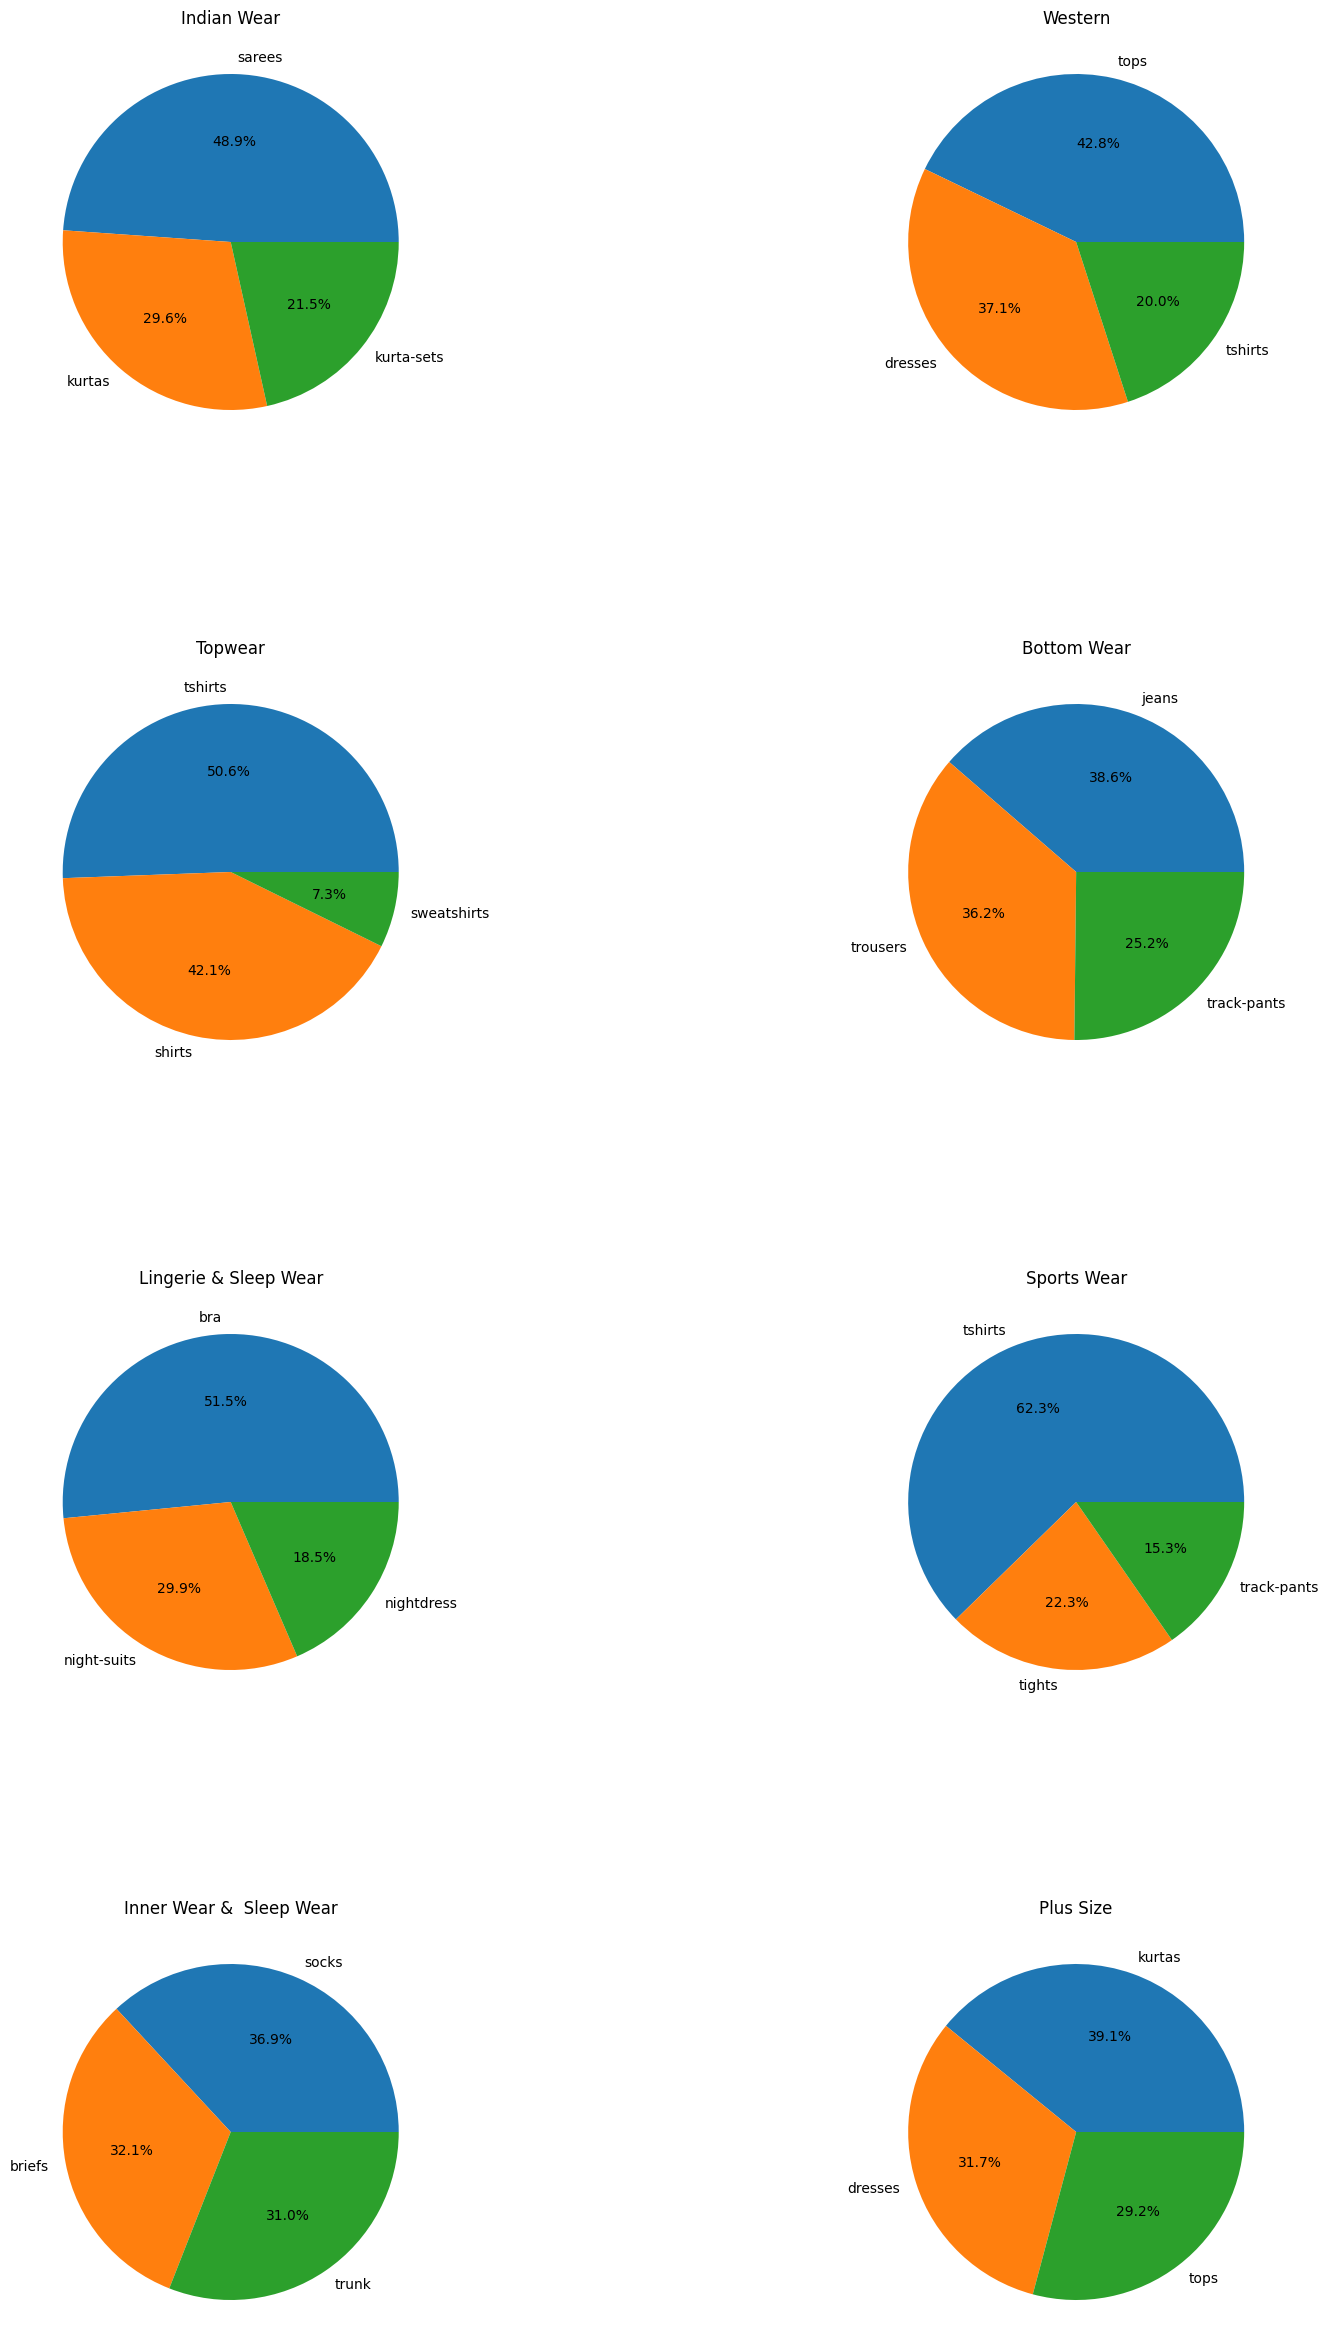

In [46]:
# create subplots with 4 rows and 2 columns
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(20,30))

top_categories = df['Category'].value_counts().head(8)

# iterate through top categories and plot pie charts
for i, category in enumerate(top_categories.index):
    top_subcategories = df[df['Category'] == category]['Individual_category'].value_counts().head(3)
    ax = axes[i//2, i%2]
    ax.set_title(category)
    ax.pie(top_subcategories, labels=top_subcategories.index, autopct='%1.1f%%')
    
plt.subplots_adjust(hspace=0.5)
plt.show()

## <span style ="color: green ;">  Minimum and Maximum Original Price for Top 5 Individual Category </span>

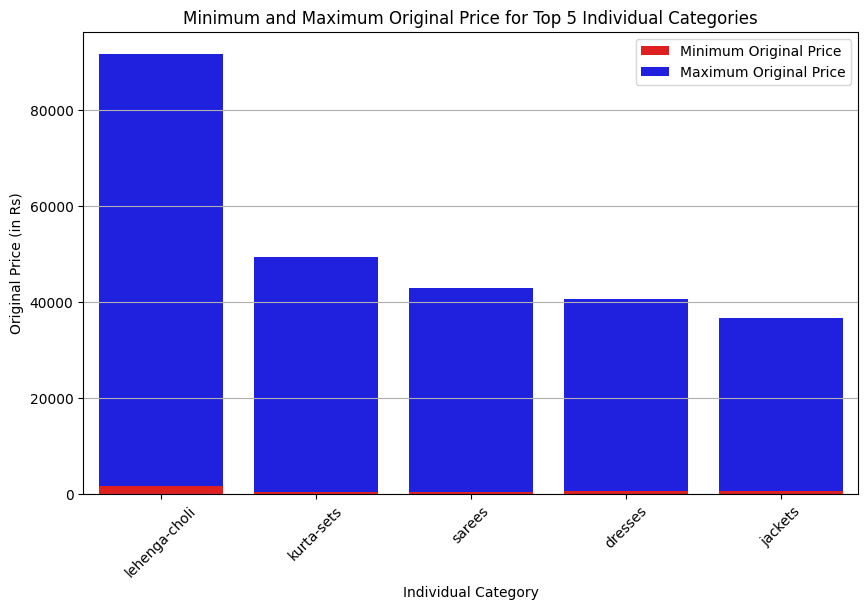

In [47]:
# Group the data by individual category and calculate the min and max original price
Individual_category_price_stats = df.groupby('Individual_category')['OriginalPrice (in Rs)'].agg(['min', 'max'])

# Calculate the total original price for each individual category
Individual_category_price_stats['total_price'] = Individual_category_price_stats['max'] - Individual_category_price_stats['min']

# Sort the individual categories based on their total original price
sorted_categories = Individual_category_price_stats['total_price'].sort_values(ascending=False)

# Select the top 5 individual categories
top_Individual_categories = sorted_categories.head()

# Plot the minimum and maximum original price for each of the top 5 individual categories
plt.figure(figsize=(10, 6))

# Plot minimum original price
sns.barplot(x=top_Individual_categories.index, 
            y='min', data=Individual_category_price_stats.loc[top_Individual_categories.index], color='red', label='Minimum Original Price')

# Plot maximum original price
sns.barplot(x=top_Individual_categories.index, 
            y='max', data=Individual_category_price_stats.loc[top_Individual_categories.index], color='blue', label='Maximum Original Price',
            bottom=Individual_category_price_stats.loc[top_Individual_categories.index]['min'])

plt.title('Minimum and Maximum Original Price for Top 5 Individual Categories')
plt.xlabel('Individual Category')
plt.ylabel('Original Price (in Rs)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(axis='y')

# Show plot
#plt.tight_layout()
plt.show()
